# Pandas => DataFrames for dummies

In [2]:
import pandas as pd

## The DATAFRAME datastructure

Basically just like an excel tabular datastructure

rows, columns (Series) & indices

### Just like numpy the api is gigantic

Like many other libraries, it is based on numpy

In [4]:
# there are many ways of creating dataframes
dataframe = pd.read_csv("../data/btc.csv")
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
dataframe.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
dataframe.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
dataframe.index

RangeIndex(start=0, stop=2640, step=1)

In [11]:
dataframe["Date"] = pd.to_datetime(dataframe["Date"], format=r"%Y-%m-%d")
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [14]:
dataframe.columns = dataframe.columns.str.lower().str.split(" ").str.join("_")

In [15]:
dataframe.head()

,date,open,high,low,close,adj_close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [18]:
type(dataframe["open"])

pandas.core.series.Series

In [19]:
type(dataframe["open"].values)

numpy.ndarray

In [22]:
avg = (dataframe["open"] + dataframe["close"]) / 2
avg

0         461.599015
1         440.649993
2         409.449494
3         401.788498
4         403.453003
            ...     
2635    50586.222657
2636    49061.101562
2637    47442.724610
2638    48313.570313
2639    49584.007812
Length: 2640, dtype: float64

In [23]:
avg.describe()

count     2640.000000
mean     10482.547870
std      15446.142137
min        193.370498
25%        587.854744
50%       6011.050781
75%      10101.651123
max      67260.781250
dtype: float64

In [24]:
dataframe.describe()

,open,high,low,close,adj_close,volume
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03
mean,10474.121920,10763.004048,10157.666271,10490.973819,10490.973819,1.419610e+10
std,15443.860296,15874.466663,14951.052594,15457.638141,15457.638141,1.994941e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,587.575256,592.518265,581.373977,587.795273,587.795273,7.594447e+07
50%,5930.529297,6181.519532,5736.933106,5940.194824,5940.194824,4.792940e+09
75%,10117.428466,10295.944580,9734.994629,10120.269287,10120.269287,2.336638e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [28]:
dataframe.corr()

,open,high,low,close,adj_close,volume
open,1.000000,0.999522,0.999057,0.998807,0.998807,0.747125
high,0.999522,1.000000,0.999013,0.999479,0.999479,0.750493
low,0.999057,0.999013,1.000000,0.999386,0.999386,0.739656
close,0.998807,0.999479,0.999386,1.000000,1.000000,0.745845
adj_close,0.998807,0.999479,0.999386,1.000000,1.000000,0.745845
volume,0.747125,0.750493,0.739656,0.745845,0.745845,1.000000


### Let's make it more interesting

### Using the available pandas functions : on each day determine if the close price went up or down compared to the last

Create a new column "up" filled with boolean values True is the price goes up False otherwise

In [77]:
dataframe["stonks"] = dataframe["close"] > dataframe["close"].shift(1)

In [78]:
dataframe["stonks"].value_counts(dropna=False)

True     1434
False    1206
Name: stonks, dtype: int64

In [73]:
dataframe["stonks"].value_counts()

False    1436
True     1204
Name: stonks, dtype: int64

### Now lets determine the gains / losses when the price has gone up / down

In [83]:
dataframe["gains"] = dataframe["close"] - dataframe["close"].shift(1)

In [86]:
dataframe["gains"].describe()

count    2639.000000
mean       18.684283
std       752.396488
min     -7554.039063
25%       -38.272522
50%         1.794007
75%        70.932373
max      7293.023438
Name: gains, dtype: float64

<AxesSubplot:>

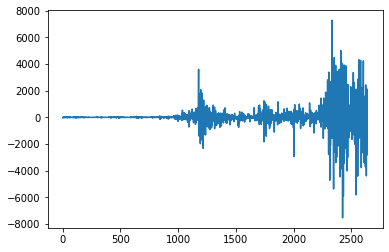

In [87]:
dataframe["gains"].plot()